In [10]:
import io
import base64
import numpy as np
from typing import List
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

def draw_boxes(image, ans, threshold=0.5):
    # Create a drawing object
    draw = ImageDraw.Draw(image)

    for obj in ans['results']:
        print(obj)
        label = obj['label']
        box = obj['box']
        score = obj['confidence']

        if score > threshold:
            box = [round(i, 2) for i in box]
            print(f"Detected {label} with confidence {round(score, 3)} at location {box}")
            draw.rectangle(box, outline='red', width=2)

    image_array = np.array(image)

    # Plot the image with bounding boxes
    plt.figure(figsize=(10, 10))
    plt.imshow(image_array)
    plt.axis('off')  # Turn off axis labels
    plt.show()

def encode_image(image_path: str) -> str:
    buffered = io.BytesIO()
    image.save(buffered, format="PNG")
    img_str = base64.b64encode(buffered.getvalue())
    base64_string = img_str.decode('utf-8')
    return base64_string

{'label': 'boats', 'confidence': 0.222, 'box': [160.02, 537.26, 221.75, 560.11]}
Detected boats with confidence 0.222 at location [160.02, 537.26, 221.75, 560.11]
{'label': 'boats', 'confidence': 0.223, 'box': [241.9, 530.59, 314.63, 581.79]}
Detected boats with confidence 0.223 at location [241.9, 530.59, 314.63, 581.79]
{'label': 'boats', 'confidence': 0.204, 'box': [1637.23, 574.51, 1650.13, 588.23]}
Detected boats with confidence 0.204 at location [1637.23, 574.51, 1650.13, 588.23]
{'label': 'boats', 'confidence': 0.243, 'box': [1625.78, 572.44, 1676.83, 589.25]}
Detected boats with confidence 0.243 at location [1625.78, 572.44, 1676.83, 589.25]
{'label': 'boats', 'confidence': 0.388, 'box': [1821.43, 577.15, 1850.94, 593.79]}
Detected boats with confidence 0.388 at location [1821.43, 577.15, 1850.94, 593.79]
{'label': 'boats', 'confidence': 0.265, 'box': [1875.79, 575.01, 1887.68, 582.33]}
Detected boats with confidence 0.265 at location [1875.79, 575.01, 1887.68, 582.33]
{'label'

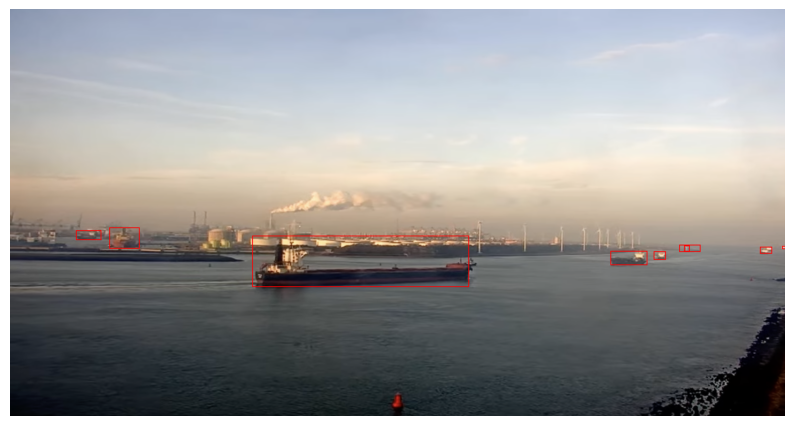

In [11]:
from watchmen.tools import owlvit

ans = owlvit([["boats"]], "boat.png")

image = Image.open('boat.png').convert('RGB')
b64img = encode_image(image)
ans['image'] = b64img
texts = [["a boat", "a cloud", "an industrial complex", "a stream of smoke"]]
draw_boxes(image, ans, threshold=0.2)